Domain
Banking

Dataset
Loan Payment data

Attributes

•	Loan_id : A unique loan number assigned to each loan customers
•	Loan_status: Whether a loan is paid off, in collection, new customer yet to payoff, or paid off after the collection efforts
•	Principal: Basic principal loan amount at the origination terms, could be weekly (7 days), biweekly, and monthly payoff schedule
•	effective_date: When the loan got originated and took effects
•	due_date: Since it’s one-time payoff schedule, each loan has one single due date
•	paidoff_time: The actual time a customer pays off the loan
•	pastdue_days: How many days a loan has been past due
•	age, education, Gender: A customer’s basic demographic information


Problems

The Loan Payment dataset contains above mentioned attributes. We would like to perform classification on Loan_status variable that contains three categories namely PAIDOFF,COLLETION AND COLLECTION_PAIDOFF. The PAIDOFF category is all about loan paid off by the customers. The COLLECTION is all about the loan is yet to be paid off so bank is collecting money from those customers who seem to be unwilling to repay the loan amount; these customers are apprehended to be defaulters.
The next and last category is COLLECTION_PAIDOFF that states that the loan amount was repaid by the customers after conducting Collection drive. 

The objective is to Classify customers into any of the given categories.
This analysis will generate valuable insights for banks to consider which customers they will provide loan to.


In [1]:
your_local_path = "C:/Users/sylve/Downloads/Machine learning/Dataset/Project datasets modified/Loan Payment/Loan Payment/"


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import preprocessing
from sklearn import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

#sns.set(style="darkgridgrid")
%matplotlib inline

In [3]:
df=pd.read_csv(your_local_path+"Loan payments data.csv")


In [4]:
df1=df.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     400 non-null object
past_due_days     200 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [6]:
df1['past_due_days'].fillna(0,inplace=True)

In [7]:
df1['paid_off_time'].fillna(0,inplace=True)

In [8]:
df1['effective_date']= pd.to_datetime(df1['effective_date'])
df1['due_date'] = pd.to_datetime(df1['due_date'])
df1['paid_off_time'] = pd.to_datetime(df1['paid_off_time'])

In [9]:
df1.columns

Index(['Loan_ID', 'loan_status', 'Principal', 'terms', 'effective_date',
       'due_date', 'paid_off_time', 'past_due_days', 'age', 'education',
       'Gender'],
      dtype='object')

In [10]:
lb_loan_status = LabelEncoder()
df1["Loan_status_code"] = lb_loan_status.fit_transform(df1["loan_status"])
df1[["loan_status","Loan_status_code"]].head(10)

,loan_status,Loan_status_code
0,PAIDOFF,2
1,PAIDOFF,2
2,PAIDOFF,2
3,PAIDOFF,2
4,PAIDOFF,2
5,PAIDOFF,2
6,PAIDOFF,2
7,PAIDOFF,2
8,PAIDOFF,2
9,PAIDOFF,2


In [11]:
df1["education"].unique()

array(['High School or Below', 'Bechalor', 'college', 'Master or Above'],
      dtype=object)

In [13]:
lb = LabelEncoder()
df1["Gender_code"] = lb.fit_transform(df1["Gender"])

In [14]:
df1["paid_off_time_code"]="Null"

In [15]:
replace_map={'education':{'High School or Below':1,'Bechalor':3,'Master or Above':4,'college':2}}
df1.replace(replace_map,inplace=True)

In [16]:
df1.head()


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status_code,Gender_code,paid_off_time_code
0,xqd20166231,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-14 19:31:00,0.0,45,1,male,2,1,Null
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,0.0,50,3,female,2,0,Null
2,xqd20160003,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-09-25 16:58:00,0.0,33,3,female,2,0,Null
3,xqd20160004,PAIDOFF,1000,15,2016-09-08,2016-09-22,2016-09-22 20:00:00,0.0,27,2,male,2,1,Null
4,xqd20160005,PAIDOFF,1000,30,2016-09-09,2016-10-08,2016-09-23 21:36:00,0.0,28,2,female,2,0,Null


In [17]:
df1.loc[df1["loan_status"]=="COLLECTION"].head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status_code,Gender_code,paid_off_time_code
300,xqd20160301,COLLECTION,1000,15,2016-09-09,2016-09-23,1970-01-01,76.0,29,2,male,0,1,Null
301,xqd20160302,COLLECTION,1000,30,2016-09-09,2016-10-08,1970-01-01,61.0,37,1,male,0,1,Null
302,xqd20160303,COLLECTION,1000,30,2016-09-09,2016-10-08,1970-01-01,61.0,33,1,male,0,1,Null
303,xqd20160304,COLLECTION,800,15,2016-09-09,2016-09-23,1970-01-01,76.0,27,2,male,0,1,Null
304,xqd20160305,COLLECTION,800,15,2016-09-09,2016-09-23,1970-01-01,76.0,24,3,male,0,1,Null


In [18]:
df1['paid_off_time_code'].unique()

array(['Null'], dtype=object)

In [19]:
df1.loc[df1["paid_off_time"]=='1970-01-01',"paid_off_time_code"]=0
df1.loc[df1["loan_status"]=='COLLECTION'].head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status_code,Gender_code,paid_off_time_code
300,xqd20160301,COLLECTION,1000,15,2016-09-09,2016-09-23,1970-01-01,76.0,29,2,male,0,1,0
301,xqd20160302,COLLECTION,1000,30,2016-09-09,2016-10-08,1970-01-01,61.0,37,1,male,0,1,0
302,xqd20160303,COLLECTION,1000,30,2016-09-09,2016-10-08,1970-01-01,61.0,33,1,male,0,1,0
303,xqd20160304,COLLECTION,800,15,2016-09-09,2016-09-23,1970-01-01,76.0,27,2,male,0,1,0
304,xqd20160305,COLLECTION,800,15,2016-09-09,2016-09-23,1970-01-01,76.0,24,3,male,0,1,0


In [20]:
df1.loc[df1["paid_off_time_code"]=='Null',"paid_off_time_code"]=1

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
Loan_ID               500 non-null object
loan_status           500 non-null object
Principal             500 non-null int64
terms                 500 non-null int64
effective_date        500 non-null datetime64[ns]
due_date              500 non-null datetime64[ns]
paid_off_time         500 non-null datetime64[ns]
past_due_days         500 non-null float64
age                   500 non-null int64
education             500 non-null int64
Gender                500 non-null object
Loan_status_code      500 non-null int32
Gender_code           500 non-null int32
paid_off_time_code    500 non-null int64
dtypes: datetime64[ns](3), float64(1), int32(2), int64(5), object(3)
memory usage: 50.9+ KB


In [22]:
df1.paid_off_time_code=df1.paid_off_time_code.astype('int64')

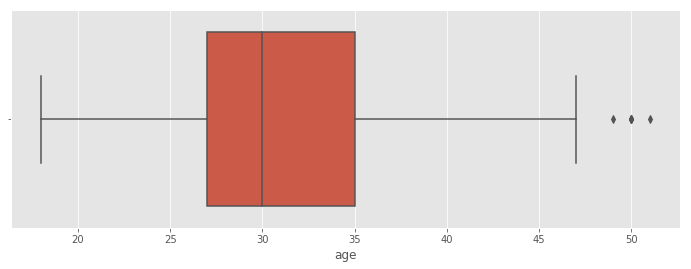

In [23]:
from matplotlib import style
style.use('ggplot')
plt.figure(figsize=(12,4))
sns.boxplot(x="age", data=df1)


In [24]:
df1[df1.age > 48]


,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender,Loan_status_code,Gender_code,paid_off_time_code
1,xqd20168902,PAIDOFF,1000,30,2016-09-08,2016-10-07,2016-10-07 09:00:00,0.0,50,3,female,2,0,1
49,xqd20160050,PAIDOFF,800,15,2016-09-11,2016-09-25,2016-09-25 19:21:00,0.0,50,1,male,2,1,1
216,xqd20160217,PAIDOFF,1000,15,2016-09-12,2016-09-26,2016-09-21 08:11:00,0.0,50,1,male,2,1,1
260,xqd20160261,PAIDOFF,800,15,2016-09-13,2016-09-27,2016-09-26 07:48:00,0.0,51,2,male,2,1,1
342,xqd20160343,COLLECTION,1000,15,2016-09-11,2016-09-25,1970-01-01 00:00:00,74.0,50,4,male,0,1,0
465,xqd20169466,COLLECTION_PAIDOFF,1000,30,2016-09-12,2016-10-11,2016-10-12 12:54:00,1.0,49,1,female,1,0,1


In [27]:
kk = []
kt = []
for i in df["education"].unique():
    df1_ed = (df1.loc[df["education"] == i, "Loan_ID"]).count()
    kk.append(df1_ed)
    kt.append(i)

print(kk)
print(kt)
kkdf=pd.DataFrame({"level_education":kt,"count":kk})
print(kkdf)


[209, 67, 220, 4]
['High School or Below', 'Bechalor', 'college', 'Master or Above']
        level_education  count
0  High School or Below    209
1              Bechalor     67
2               college    220
3       Master or Above      4


Text(0.5, 0, 'Education')

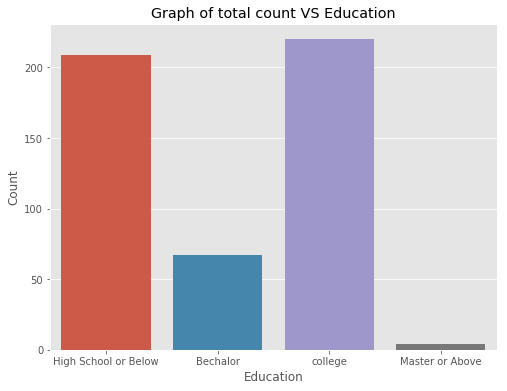

In [28]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=kkdf["level_education"], y=kkdf["count"])
ax.set_title("Graph of total count VS Education")
ax.set_ylabel('Count')
ax.set_xlabel('Education')


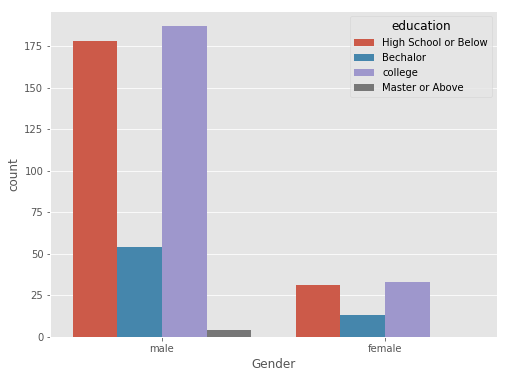

In [51]:
plt.figure(figsize=(8,6))

ax=sns.countplot(x=df["Gender"], hue=df["education"])


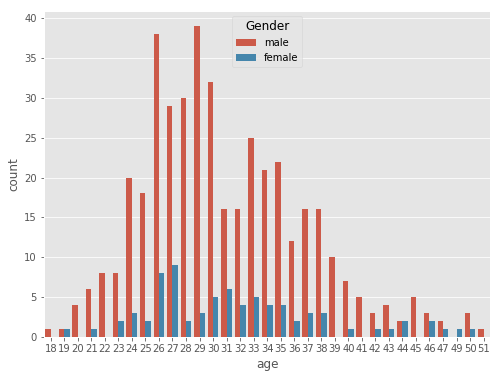

In [50]:
plt.figure(figsize=(8,6))

ax=sns.countplot(x=df["age"], hue=df["Gender"])

In [29]:
df[(df.education == "Bechalor")&(df.Gender == "male")].count()

Loan_ID           54
loan_status       54
Principal         54
terms             54
effective_date    54
due_date          54
paid_off_time     43
past_due_days     25
age               54
education         54
Gender            54
dtype: int64

In [30]:
df.age[(df.education == "Bechalor")&(df.Gender == "male")&(df.age > 30)].count()

31

In [31]:
for i in df["education"].unique():
    for j in df["Gender"].unique():
        df1_e=df.age[(df.education == i)&(df.Gender == j)&(df.age > 30)].count()
        print(i,j,df1_e)
                            

High School or Below male 80
High School or Below female 17
Bechalor male 31
Bechalor female 11
college male 74
college female 13
Master or Above male 4
Master or Above female 0


In [32]:
list(df1)


['Loan_ID',
 'loan_status',
 'Principal',
 'terms',
 'effective_date',
 'due_date',
 'paid_off_time',
 'past_due_days',
 'age',
 'education',
 'Gender',
 'Loan_status_code',
 'Gender_code',
 'paid_off_time_code']

In [36]:
columns1 = ['Loan_status_code']
target = df1[list(columns1)].values
target

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    

In [35]:
columns = ['Principal',
 'terms',
 'past_due_days',
 'age',
 'education',
 'Gender_code',
 'education','paid_off_time_code']
features_1=df1[list(columns)].values


In [ ]:
features_1

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features_1,target,test_size=0.20,random_state=123)

In [38]:
my_tree_one = tree.DecisionTreeRegressor(criterion="mse", max_depth=3)
my_tree_one = my_tree_one.fit(x_train, y_train)

my_tree_one

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [39]:
pred = my_tree_one.predict(x_test)

In [41]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))

1.0
[[24  0  0]
 [ 0 13  0]
 [ 0  0 63]]
